In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbs
import datetime
import pymc as pm
from datetime import timedelta
pd.options.display.max_columns = 50

## Get first generic futures prices

In [2]:
path = "C:/Users/pc/Desktop/SG_project/Data/generic_prices/"

files_to_read = [
'snp_futeres_price',
'vix_futeres_price',
'yen_futeres_price', 
'two_years_us_yield',
'five_years_us_yield',              
'ten_years_us_yield',
'euro_dollar_futeres_price',
'wheat_hrw_futeres_price',
'live_cattle_futeres_price',  
'feeder_cattle_futeres_price',   
'gold_futeres_price', 
'coffee_futeres_price', 
'nut_gas_ice_futeres_price',
'nut_gas_nymex_futeres_price', 
'crude_oil_ls_futeres_price',
'soybean_oil_futeres_price', 
'corn_futeres_price',
'frzn_orange_juice_futures_price', 
'sugar_futures_price', 
'copper_futures_price']

# read treasury futures separately because of the required conversion to decimal price (new column was created)
treasury_futures = ['two_tnote_futeres_price', 'five_tnote_futeres_price', 'ten_tnote_futeres_price', ]
# much shorted timeseries than other, will read separately
#read_separately = ['ten_ultra_tnote_futeres_price', 'prob_of_hike']

start = "2010-10-01"; end = "2018-04-25"
index = pd.bdate_range(start=start, end=end)
df = pd.DataFrame(index=index)
for file in files_to_read:
    data = pd.read_csv(path+file+".csv", parse_dates=True, index_col=[0])
    data = data.rename(columns={"Last Price": file})
    data[file] = pd.to_numeric(np.reshape(data.values,-1), errors="coerce")
    df = df.join(data, how='left') 
    
for file in treasury_futures:
    data = pd.read_csv(path+file+".csv", parse_dates=True, index_col=[0], usecols=[0,2])
    data = data.rename(columns={"Decimal Price": file})
    data[file] = pd.to_numeric(np.reshape(data.values,-1), errors="coerce")
    df = df.join(data, how='left')
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price
2010-10-01,1142.25,24.75,120.07,0.4145,1.2565,2.5097,95.845,689.25,95.950,111.800,1316.1,181.10,46.76,3.797,81.58,43.49,465.75,155.65,23.36,369.05,109.757812,120.906250,126.078125
2010-10-04,1134.75,25.15,120.03,0.4066,1.2241,2.4758,95.890,683.00,95.100,110.500,1315.4,172.50,46.38,3.727,81.47,43.10,471.50,154.65,22.99,366.40,109.773438,121.093750,126.468750
2010-10-05,1154.75,23.65,120.28,0.3987,1.1917,2.4722,95.875,701.00,95.550,109.550,1338.9,177.00,47.12,3.743,82.82,43.47,491.00,158.50,23.74,372.65,109.773438,121.187500,126.640625
2010-10-06,1155.75,23.25,120.65,0.3829,1.1593,2.3976,95.925,697.50,94.850,109.200,1346.4,175.55,46.77,3.865,83.23,43.44,488.50,150.45,23.54,375.30,109.828125,121.359375,127.093750
2010-10-07,1156.50,22.95,121.52,0.3512,1.1270,2.3833,95.925,699.50,95.125,108.925,1333.9,173.45,46.54,3.617,81.67,43.79,498.25,151.20,25.16,367.95,109.882812,121.484375,127.140625


In [3]:
df.isnull().sum()

snp_futeres_price                  66
vix_futeres_price                  70
yen_futeres_price                  66
two_years_us_yield                 83
five_years_us_yield                83
ten_years_us_yield                 83
euro_dollar_futeres_price          66
wheat_hrw_futeres_price            68
live_cattle_futeres_price          68
feeder_cattle_futeres_price        67
gold_futeres_price                 68
coffee_futeres_price               69
nut_gas_ice_futeres_price          26
nut_gas_nymex_futeres_price        68
crude_oil_ls_futeres_price         68
soybean_oil_futeres_price          67
corn_futeres_price                 68
frzn_orange_juice_futures_price    68
sugar_futures_price                69
copper_futures_price               68
two_tnote_futeres_price            78
five_tnote_futeres_price           78
ten_tnote_futeres_price            95
dtype: int64

In [4]:
# fillna with the average of the nearest neighbors
df = df.where(df==np.nan, other=(df.fillna(method="ffill")+df.fillna(method="bfill"))/2)
df.isnull().sum()

snp_futeres_price                  0
vix_futeres_price                  0
yen_futeres_price                  0
two_years_us_yield                 0
five_years_us_yield                0
ten_years_us_yield                 0
euro_dollar_futeres_price          0
wheat_hrw_futeres_price            0
live_cattle_futeres_price          0
feeder_cattle_futeres_price        0
gold_futeres_price                 0
coffee_futeres_price               0
nut_gas_ice_futeres_price          0
nut_gas_nymex_futeres_price        0
crude_oil_ls_futeres_price         0
soybean_oil_futeres_price          0
corn_futeres_price                 0
frzn_orange_juice_futures_price    0
sugar_futures_price                0
copper_futures_price               0
two_tnote_futeres_price            0
five_tnote_futeres_price           0
ten_tnote_futeres_price            0
dtype: int64

In [5]:
import pickle
def save_obj(obj, name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
save_obj(df, "df_generic1_prices")

In [6]:
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price
2010-10-01,1142.25,24.75,120.07,0.4145,1.2565,2.5097,95.845,689.25,95.950,111.800,1316.1,181.10,46.76,3.797,81.58,43.49,465.75,155.65,23.36,369.05,109.757812,120.906250,126.078125
2010-10-04,1134.75,25.15,120.03,0.4066,1.2241,2.4758,95.890,683.00,95.100,110.500,1315.4,172.50,46.38,3.727,81.47,43.10,471.50,154.65,22.99,366.40,109.773438,121.093750,126.468750
2010-10-05,1154.75,23.65,120.28,0.3987,1.1917,2.4722,95.875,701.00,95.550,109.550,1338.9,177.00,47.12,3.743,82.82,43.47,491.00,158.50,23.74,372.65,109.773438,121.187500,126.640625
2010-10-06,1155.75,23.25,120.65,0.3829,1.1593,2.3976,95.925,697.50,94.850,109.200,1346.4,175.55,46.77,3.865,83.23,43.44,488.50,150.45,23.54,375.30,109.828125,121.359375,127.093750
2010-10-07,1156.50,22.95,121.52,0.3512,1.1270,2.3833,95.925,699.50,95.125,108.925,1333.9,173.45,46.54,3.617,81.67,43.79,498.25,151.20,25.16,367.95,109.882812,121.484375,127.140625


In [7]:
df_diff = df-df.shift(1)
# align start and end with the cftc data index 
start1 = pd.to_datetime('2011-01-04 00:00:00'); end1 = pd.to_datetime('2018-04-03 00:00:00')
df_diff = df_diff[start1:end1]
save_obj(df_diff, "df_generic1_price_change")
df_diff.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price
2011-01-04,0.00,-0.20,-0.54,0.0238,0.0033,-0.0037,-0.025,-13.75,-0.800,-0.250,-44.1,-2.775,-2.75,0.019,-2.17,-0.76,-12.00,-2.75,-0.56,-8.85,-0.031250,0.031250,0.140625
2011-01-05,6.50,-0.40,-1.96,0.0874,0.1324,0.1367,-0.175,24.00,0.450,-0.025,-5.1,-1.950,-1.92,-0.196,0.92,0.92,10.75,4.40,1.20,3.90,-0.234375,-0.671875,-1.078125
2011-01-06,-1.50,-0.05,0.06,-0.0397,-0.0731,-0.0722,0.110,-14.75,0.100,0.950,-2.0,0.000,1.20,-0.039,-1.92,-0.35,-17.25,1.40,-1.96,-7.85,0.101562,0.320312,0.578125
2011-01-07,-2.75,0.05,0.35,-0.0717,-0.1059,-0.0695,0.090,-12.25,-0.350,-0.325,-2.8,-2.300,-1.44,-0.012,-0.35,-0.55,-7.00,5.25,1.29,-4.70,0.164062,0.656250,0.859375
2011-01-10,-2.00,-0.05,0.34,-0.0240,-0.0463,-0.0405,0.035,-4.75,0.575,0.700,5.2,0.550,-1.24,-0.023,1.22,0.31,12.00,-3.05,0.21,-1.80,0.054688,0.125000,0.203125


In [8]:
prob_of_hike = pd.read_csv(path+"prob_of_hike.csv", parse_dates=True, index_col=[0])
prob_of_hike = prob_of_hike.reindex(index=prob_of_hike.index[::-1])
prob_of_hike.head()

,Probability of Hike,Probability of No Change (1.5-1.75),Probability of Cut
Date,,,
2017-05-11,7.5,24.5,68.1
2017-05-12,3.9,19.1,77.0
2017-05-15,3.0,16.8,80.2
2017-05-16,3.0,16.8,80.2
2017-05-17,1.4,10.1,88.5


## Get prepared cftc data

In [9]:
def load_obj(name):
    with open('C:/Users/pc/Desktop/SG_project/Pickled/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)
dictionary_commodities = load_obj("dictionary_commodities")
dictionary_financials = load_obj("dictionary_financials")

In [10]:
dictionary_commodities.keys()

dict_keys(['CORN - CHICAGO BOARD OF TRADE', 'OATS - CHICAGO BOARD OF TRADE', 'COTTON NO. 2 - ICE FUTURES U.S.', 'ROUGH RICE - CHICAGO BOARD OF TRADE', 'LEAN HOGS - CHICAGO MERCANTILE EXCHANGE', 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE', 'FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE', 'SOYBEANS - CHICAGO BOARD OF TRADE', 'SOYBEAN OIL - CHICAGO BOARD OF TRADE', 'SOYBEAN MEAL - CHICAGO BOARD OF TRADE', 'COCOA - ICE FUTURES U.S.', 'SUGAR NO. 11 - ICE FUTURES U.S.', 'COFFEE C - ICE FUTURES U.S.', 'CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE', 'GOLD - COMMODITY EXCHANGE INC.', 'NATURAL GAS - NEW YORK MERCANTILE EXCHANGE', 'NATURAL GAS ICE HENRY HUB - ICE FUTURES ENERGY DIV', 'COPPER-GRADE #1 - COMMODITY EXCHANGE INC.', 'FRZN CONCENTRATED ORANGE JUICE - ICE FUTURES U.S.'])

In [11]:
dictionary_financials.keys()

dict_keys(['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE', 'VIX FUTURES - CBOE FUTURES EXCHANGE', 'EURO FX - CHICAGO MERCANTILE EXCHANGE', '3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE', 'BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE', 'JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE', '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE', 'CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE'])

In [12]:
dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE'].columns

Index(['Market_and_Exchange_Names', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Commodity_Code', 'Open_Interest_All',
       'Dealer_Positions_Long_All', 'Dealer_Positions_Short_All',
       'Dealer_Positions_Spread_All', 'Asset_Mgr_Positions_Long_All',
       'Asset_Mgr_Positions_Short_All', 'Asset_Mgr_Positions_Spread_All',
       'Lev_Money_Positions_Long_All', 'Lev_Money_Positions_Short_All',
       'Lev_Money_Positions_Spread_All', 'Tot_Rept_Positions_Long_All',
       'Tot_Rept_Positions_Short_All', 'Change_in_Open_Interest_All',
       'Change_in_Dealer_Long_All', 'Change_in_Dealer_Short_All',
       'Change_in_Dealer_Spread_All', 'Change_in_Asset_Mgr_Long_All',
       'Change_in_Asset_Mgr_Short_All', 'Change_in_Asset_Mgr_Spread_All',
       'Change_in_Lev_Money_Long_All', 'Change_in_Lev_Money_Short_All',
       'Change_in_Lev_Money_Spread_All', 'Change_in_Tot_Rept_Long_All',
       'Change_in_Tot_Rept_Short_All', 'Pct_of_Open_Interest_All',
       'Pct_of_OI_D

In [13]:
save_obj(dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE'].index, "cftc_index")

In [14]:
dictionary_financials['E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE'].columns

Index(['Market_and_Exchange_Names', 'CFTC_Contract_Market_Code',
       'CFTC_Market_Code', 'CFTC_Commodity_Code', 'Open_Interest_All',
       'Dealer_Positions_Long_All', 'Dealer_Positions_Short_All',
       'Dealer_Positions_Spread_All', 'Asset_Mgr_Positions_Long_All',
       'Asset_Mgr_Positions_Short_All', 'Asset_Mgr_Positions_Spread_All',
       'Lev_Money_Positions_Long_All', 'Lev_Money_Positions_Short_All',
       'Lev_Money_Positions_Spread_All', 'Tot_Rept_Positions_Long_All',
       'Tot_Rept_Positions_Short_All', 'Change_in_Open_Interest_All',
       'Change_in_Dealer_Long_All', 'Change_in_Dealer_Short_All',
       'Change_in_Dealer_Spread_All', 'Change_in_Asset_Mgr_Long_All',
       'Change_in_Asset_Mgr_Short_All', 'Change_in_Asset_Mgr_Spread_All',
       'Change_in_Lev_Money_Long_All', 'Change_in_Lev_Money_Short_All',
       'Change_in_Lev_Money_Spread_All', 'Change_in_Tot_Rept_Long_All',
       'Change_in_Tot_Rept_Short_All', 'Pct_of_Open_Interest_All',
       'Pct_of_OI_D

In [15]:
def set_cftc_index(df, fill_method):
    use_index = load_obj("cftc_index")
    df = df.reindex(pd.date_range(use_index[0],use_index[-1], freq='D'))
    #df = df.asfreq("D")
    if fill_method == "ffill":
        df.fillna(method="ffill", inplace=True)
        # fill the remaining
        df.fillna(method="bfill", inplace=True)
    elif fill_method == "bfill":
        df.fillna(method="bfill", inplace=True)
        # fill the remaining
        df.fillna(method="ffill", inplace=True)
    elif fill_method == "avg":
        df = df.where(df==np.nan, other=(df.fillna(method="ffill")+df.fillna(method="bfill"))/2)
        # fill the remaining
        df.fillna(method="ffill", inplace=True)
        df.fillna(method="bfill", inplace=True)
    
    df = df.reindex(use_index)    
    return pd.DataFrame(df)

In [16]:
df_diff = set_cftc_index(df_diff, "avg")

In [17]:
df_diff.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price
,,,,,,,,,,,,,,,,,,,,,,,
2011-01-04,0.000,-0.200,-0.540,0.0238,0.00330,-0.0037,-0.0250,-13.75,-0.8000,-0.250,-44.10,-2.775,-2.75,0.0190,-2.17,-0.760,-12.000,-2.750,-0.560,-8.85,-0.031250,0.031250,0.140625
2011-01-11,5.000,-0.700,-0.650,0.0159,0.04940,0.0564,-0.0750,-3.50,1.5000,1.150,10.20,3.450,0.55,0.0820,1.86,-0.490,0.000,-6.600,1.010,8.45,-0.015625,-0.164062,-0.328125
2011-01-18,2.625,-0.175,0.315,0.0080,0.01645,0.0216,-0.0375,8.25,-0.0875,0.850,3.85,0.375,-0.10,-0.0275,-0.08,0.425,5.375,1.175,0.115,0.80,0.000000,-0.257812,-0.132812
2011-01-25,-1.000,-0.200,0.500,-0.0490,-0.07000,-0.0760,0.0900,9.50,-0.5250,-0.375,-12.20,-6.050,-0.37,-0.1070,-1.68,-1.400,-11.250,-0.150,-0.470,-12.25,0.085938,0.375000,0.687500
2011-02-01,20.250,-1.150,0.890,0.0393,0.07250,0.0690,-0.0800,-0.75,0.0500,-0.525,5.80,4.600,0.42,-0.0730,-1.42,0.840,6.500,1.000,-0.010,8.85,-0.093750,-0.343750,-0.500000


In [18]:
df_diff.columns

Index(['snp_futeres_price', 'vix_futeres_price', 'yen_futeres_price',
       'two_years_us_yield', 'five_years_us_yield', 'ten_years_us_yield',
       'euro_dollar_futeres_price', 'wheat_hrw_futeres_price',
       'live_cattle_futeres_price', 'feeder_cattle_futeres_price',
       'gold_futeres_price', 'coffee_futeres_price',
       'nut_gas_ice_futeres_price', 'nut_gas_nymex_futeres_price',
       'crude_oil_ls_futeres_price', 'soybean_oil_futeres_price',
       'corn_futeres_price', 'frzn_orange_juice_futures_price',
       'sugar_futures_price', 'copper_futures_price',
       'two_tnote_futeres_price', 'five_tnote_futeres_price',
       'ten_tnote_futeres_price'],
      dtype='object')

In [19]:
snp_index = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/^GSPC.csv", parse_dates=True, index_col=[0], usecols=[0,5])
snp_index = snp_index.rename(columns={"Adj Close":"S&P_index"})

In [20]:
vix_index = pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/^VIX.csv", parse_dates=True, index_col=[0], usecols=[0,5])
vix_index = vix_index.rename(columns={"Adj Close":"VIX_index"})

In [21]:
fed_funds_rate =pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/FEDFUNDS.csv", index_col=[0], parse_dates=True)
fed_funds_rate.loc["2011-01-04":].head()

,FEDFUNDS
DATE,
2011-02-01,0.16
2011-03-01,0.14
2011-04-01,0.10
2011-05-01,0.09
2011-06-01,0.09


In [22]:
snp_index_diff = set_cftc_index(snp_index-snp_index.shift(), "avg")
snp_index = set_cftc_index(snp_index, "avg")
vix_index_diff = set_cftc_index(vix_index-vix_index.shift(), "avg")
vix_index = set_cftc_index(vix_index, "avg")

In [23]:
# vix_index.isnull().unstack()[vix_index.isnull().unstack()]
fed_funds_rate = set_cftc_index(fed_funds_rate, "avg")

In [24]:
fed_funds_rate.tail()

,FEDFUNDS
,
2018-03-06,1.51
2018-03-13,1.51
2018-03-20,1.51
2018-03-27,1.51
2018-04-03,1.51


In [25]:
unempl_rate =pd.read_csv("C:/Users/pc/Desktop/SG_project/Data/UNRATE.csv", index_col=[0], parse_dates=True)
unempl_rate.loc["2011-01-04":].head()

,UNRATE
DATE,
2011-02-01,9.0
2011-03-01,9.0
2011-04-01,9.1
2011-05-01,9.0
2011-06-01,9.1


In [26]:
unempl_rate.tail()

,UNRATE
DATE,
2017-11-01,4.1
2017-12-01,4.1
2018-01-01,4.1
2018-02-01,4.1
2018-03-01,4.1


In [27]:
unempl_rate = set_cftc_index(unempl_rate, "avg")

In [28]:
df = set_cftc_index(df, "avg")
df.head()

,snp_futeres_price,vix_futeres_price,yen_futeres_price,two_years_us_yield,five_years_us_yield,ten_years_us_yield,euro_dollar_futeres_price,wheat_hrw_futeres_price,live_cattle_futeres_price,feeder_cattle_futeres_price,gold_futeres_price,coffee_futeres_price,nut_gas_ice_futeres_price,nut_gas_nymex_futeres_price,crude_oil_ls_futeres_price,soybean_oil_futeres_price,corn_futeres_price,frzn_orange_juice_futures_price,sugar_futures_price,copper_futures_price,two_tnote_futeres_price,five_tnote_futeres_price,ten_tnote_futeres_price
,,,,,,,,,,,,,,,,,,,,,,,
2011-01-04,1265.25,19.10,122.06,0.6171,2.0059,3.3287,94.815,849.25,106.175,121.000,1378.8,234.95,58.32,4.669,89.38,56.33,608.5,177.55,31.00,436.9,109.398438,117.687500,120.312500
2011-01-11,1270.50,17.95,120.20,0.5850,1.9624,3.3396,94.800,838.00,108.450,123.450,1384.3,234.70,55.47,4.481,91.11,56.17,607.0,178.95,32.75,434.9,109.468750,117.953125,120.546875
2011-01-18,1294.75,15.90,121.17,0.5845,1.9517,3.3663,94.735,876.50,109.200,127.300,1368.2,235.35,55.66,4.425,91.38,57.55,659.5,175.40,31.12,442.8,109.492188,118.101562,120.593750
2011-01-25,1287.50,18.20,121.74,0.5760,1.9378,3.3284,94.795,917.50,106.250,125.975,1332.3,231.25,54.69,4.473,86.19,55.78,644.0,170.65,31.84,422.6,109.507812,118.242188,120.921875
2011-02-01,1302.75,17.95,122.85,0.6013,2.0132,3.4394,94.570,924.00,109.000,127.475,1339.6,249.40,53.08,4.347,90.77,58.72,666.0,169.55,33.96,454.7,109.500000,118.070312,120.296875


In [29]:
df_change_net_positions = load_obj("df_change_net_positions")
df_net_positions = load_obj("df_net_positions")

In [30]:
corr_mat = df_change_net_positions.corr()[(abs(df_change_net_positions.corr()) >= .5)].replace(1, np.nan).dropna(0, how='all')
corr_mat

,E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE_AM,E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE_LM,VIX FUTURES - CBOE FUTURES EXCHANGE_AM,VIX FUTURES - CBOE FUTURES EXCHANGE_LM,EURO FX - CHICAGO MERCANTILE EXCHANGE_AM,EURO FX - CHICAGO MERCANTILE EXCHANGE_LM,3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE_AM,3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE_LM,BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE_AM,BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE_LM,JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE_AM,JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE_LM,2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM,2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM,10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM,10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM,5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM,5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE_AM,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE_LM,CORN - CHICAGO BOARD OF TRADE_MM,OATS - CHICAGO BOARD OF TRADE_MM,COTTON NO. 2 - ICE FUTURES U.S._MM,ROUGH RICE - CHICAGO BOARD OF TRADE_MM,LEAN HOGS - CHICAGO MERCANTILE EXCHANGE_MM,LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE_MM,FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE_MM,SOYBEANS - CHICAGO BOARD OF TRADE_MM,SOYBEAN OIL - CHICAGO BOARD OF TRADE_MM,SOYBEAN MEAL - CHICAGO BOARD OF TRADE_MM,COCOA - ICE FUTURES U.S._MM,SUGAR NO. 11 - ICE FUTURES U.S._MM,COFFEE C - ICE FUTURES U.S._MM,"CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE_MM",GOLD - COMMODITY EXCHANGE INC._MM,NATURAL GAS - NEW YORK MERCANTILE EXCHANGE_MM,NATURAL GAS ICE HENRY HUB - ICE FUTURES ENERGY DIV_MM,COPPER-GRADE #1 - COMMODITY EXCHANGE INC._MM,FRZN CONCENTRATED ORANGE JUICE - ICE FUTURES U.S._MM
VIX FUTURES - CBOE FUTURES EXCHANGE_AM,NaN,NaN,NaN,-0.564553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIX FUTURES - CBOE FUTURES EXCHANGE_LM,NaN,NaN,-0.564553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.534911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.534911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.716408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.716408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.689839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.689839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE_MM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.510978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE_MM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.510978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
corr_dict = {}
for index in corr_mat.index:
    for column in corr_mat.columns:
        if not np.isnan(corr_mat.loc[index][column]):
            corr_dict[str(index)] = column
corr_dict

{'VIX FUTURES - CBOE FUTURES EXCHANGE_AM': 'VIX FUTURES - CBOE FUTURES EXCHANGE_LM',
 'VIX FUTURES - CBOE FUTURES EXCHANGE_LM': 'VIX FUTURES - CBOE FUTURES EXCHANGE_AM',
 '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM': '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM',
 '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM': '2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM',
 '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM': '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM',
 '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM': '10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM',
 '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM': '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM',
 '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM': '5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM',
 'LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE_MM': 'FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE_MM',
 'FEEDER CATTLE - CHICAGO

In [32]:
df_net_positions.corr()[(abs(df_net_positions.corr()) >= .5)].replace(1, np.nan).dropna(0, how='all')

,E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE_AM,E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE_LM,VIX FUTURES - CBOE FUTURES EXCHANGE_AM,VIX FUTURES - CBOE FUTURES EXCHANGE_LM,EURO FX - CHICAGO MERCANTILE EXCHANGE_AM,EURO FX - CHICAGO MERCANTILE EXCHANGE_LM,3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE_AM,3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE_LM,BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE_AM,BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE_LM,JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE_AM,JAPANESE YEN - CHICAGO MERCANTILE EXCHANGE_LM,2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM,2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM,10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM,10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM,5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_AM,5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE_LM,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE_AM,CANADIAN DOLLAR - CHICAGO MERCANTILE EXCHANGE_LM,CORN - CHICAGO BOARD OF TRADE_MM,OATS - CHICAGO BOARD OF TRADE_MM,COTTON NO. 2 - ICE FUTURES U.S._MM,ROUGH RICE - CHICAGO BOARD OF TRADE_MM,LEAN HOGS - CHICAGO MERCANTILE EXCHANGE_MM,LIVE CATTLE - CHICAGO MERCANTILE EXCHANGE_MM,FEEDER CATTLE - CHICAGO MERCANTILE EXCHANGE_MM,SOYBEANS - CHICAGO BOARD OF TRADE_MM,SOYBEAN OIL - CHICAGO BOARD OF TRADE_MM,SOYBEAN MEAL - CHICAGO BOARD OF TRADE_MM,COCOA - ICE FUTURES U.S._MM,SUGAR NO. 11 - ICE FUTURES U.S._MM,COFFEE C - ICE FUTURES U.S._MM,"CRUDE OIL, LIGHT SWEET - NEW YORK MERCANTILE EXCHANGE_MM",GOLD - COMMODITY EXCHANGE INC._MM,NATURAL GAS - NEW YORK MERCANTILE EXCHANGE_MM,NATURAL GAS ICE HENRY HUB - ICE FUTURES ENERGY DIV_MM,COPPER-GRADE #1 - COMMODITY EXCHANGE INC._MM,FRZN CONCENTRATED ORANGE JUICE - ICE FUTURES U.S._MM
E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE_AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.709162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.563773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE_LM,NaN,NaN,NaN,NaN,0.520158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIX FUTURES - CBOE FUTURES EXCHANGE_AM,NaN,NaN,NaN,-0.592559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIX FUTURES - CBOE FUTURES EXCHANGE_LM,NaN,NaN,-0.592559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EURO FX - CHICAGO MERCANTILE EXCHANGE_AM,NaN,0.520158,NaN,NaN,NaN,NaN,-0.535107,-0.728849,NaN,NaN,NaN,NaN,0.733757,NaN,NaN,NaN,0.594848,-0.626520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.646025,NaN,NaN,NaN,NaN,NaN,NaN,0.677523,NaN
EURO FX - CHICAGO MERCANTILE EXCHANGE_LM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.619410,NaN,NaN
3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE_AM,NaN,NaN,NaN,NaN,-0.535107,NaN,NaN,NaN,0.609845,NaN,0.543211,NaN,NaN,NaN,NaN,0.533126,-0.769320,0.742223,NaN,NaN,0.602920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.593550
3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE_LM,NaN,NaN,NaN,NaN,-0.728849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.635465,0.572328,NaN,NaN,NaN,NaN,-0.580597,NaN,NaN,-0.565052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.584845,NaN,-0.607918,NaN,-0.618292,NaN
BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE_AM,0.709162,NaN,NaN,NaN,NaN,NaN,0.609845,NaN,NaN,0.602913,NaN,NaN,NaN,NaN,NaN,0.632294,-0.637125,0.610322,NaN,NaN,NaN,0.554559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BRITISH POUND STERLING - CHICAGO MERCANTILE EXCHANGE_LM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.602913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [33]:
# def plot_scatter(x, y, lag):
#     print("Regression is done with lag ", lag)
#     import matplotlib as mpl
#     from scipy import stats
#     from scipy.stats.stats import pearsonr
    
#     if lag != 0:
#         x = pd.DataFrame(x.shift(-lag))
#         # merge data and drop NaN. If want to perform regression with lags (so regression 
#         # doesn't crash because of the NaN).
#         joined = x.join(pd.DataFrame(y), how='outer').dropna(0)
#         plt_dates = mpl.dates.date2num(joined.index.to_pydatetime())
#         x = joined[joined.columns[0]].values.reshape(-1); y = joined[joined.columns[1]].values.reshape(-1)
        
#     else:
#         x = x.values.reshape(-1); y = y.values.reshape(-1)
#         plt_dates = mpl.dates.date2num(load_obj("cftc_index").to_pydatetime())
        
#     plt.rc('figure',figsize=(16,8))
#     #plt.axhline(y=0, linestyle='--', lw=.5, color='black')
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
#     corr = pearsonr(x, y)
#     print("R-squared(whole data set): ",r_value**2)
#     print("Correlation = ", corr[0])
#     line2_plot = intercept + slope*x
#     cm = plt.cm.get_cmap('viridis')
#     plt.plot(x, line2_plot, color='red', lw=.5, )
    
#     # last 50 data points correspond roughly to a year   
#     slope, intercept, r_value, p_value, std_err = stats.linregress(x[-50:], y[-50:])
#     corr = pearsonr(x[-50:], y[-50:])
#     print("R-squared(last year): ",r_value**2)
#     print("Correlation = ", corr[0])
#     line2_plot = intercept + slope*x[-50:]
#     plt.plot(x[-50:], line2_plot, color='red', lw=.5)
    
#     # set the size of the dots proportional ot the FEDFUNDS
#     plt.scatter(x, y, c=plt_dates, s=fed_funds_rate*40,  cmap=cm)
#     plt.colorbar(ticks=mpl.dates.YearLocator(1, month=6), format=mpl.dates.DateFormatter('%d %b %y'))

In [34]:
import statsmodels.api as sm

c:\users\pc\appdata\local\programs\python\python36-32\lib\site-packages\statsmodels-0.8.0-py3.6-win32.egg\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [48]:
def mult_lin_reg(y, *args):
    # for each x_i provide a lag
    # (Series,       Series1, 0, Series2, 0, Series, 1)
    import matplotlib as mpl
    import statsmodels.api as sm
    from scipy.stats.stats import pearsonr

    joined = pd.DataFrame(y)
    for i in range(len(args)):
        if i % 2 == 0:
            if args[i+1] != 0:
                joined = joined.join(pd.DataFrame(args[i].shift(-args[i+1])), how='outer')
            else:
                joined = joined.join(pd.DataFrame(args[i]), how='outer')

    joined = joined.dropna(0)
    y = joined[joined.columns[0]].values 
    x = joined[joined.columns[1:]].values
    X = sm.add_constant(x)
    # if only one independent variable -- make a plot 
    if len(args) == 2:
        plt_dates = mpl.dates.date2num(joined.index.to_pydatetime())
        
        plt.rc('figure',figsize=(16,8))
        model = sm.OLS(y, X).fit()
        print(model.summary())
        corr = pearsonr(x.flatten(), y.flatten())
        print("Correlation = ", corr[0])
        plt.plot(x, model.fittedvalues, color='red', lw=.5)
        
        # last 50 data points correspond roughly to a year   
        model = sm.OLS(y[-50:], X[-50:]).fit()
        print(model.summary())
        corr = pearsonr(x.flatten()[-50:], y.flatten()[-50:])
        print("Correlation = ", corr[0])
        plt.plot(x[-50:], model.fittedvalues, color='red', lw=.5)

        # set the size of the dots proportional ot the FEDFUNDS
        cm = plt.cm.get_cmap('viridis')
        plt.scatter(x, y, c=plt_dates, s=fed_funds_rate*40,  cmap=cm)
        plt.colorbar(ticks=mpl.dates.YearLocator(1, month=6), format=mpl.dates.DateFormatter('%d %b %y'))
    else:
        model = sm.OLS(y, X).fit()
        print(model.summary())
        model = sm.OLS(y[-50:], X[-50:]).fit()
        print(model.summary())
        return joined.corr()
           
       

In [66]:
mult_lin_reg(dictionary_financials["EURO FX - CHICAGO MERCANTILE EXCHANGE"]\
             ["Net_Positioning_Lev_Money"], vix_index, 0, unempl_rate, 0, df['ten_years_us_yield'], 9) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     56.35
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           5.73e-30
Time:                        22:46:46   Log-Likelihood:                -4532.2
No. Observations:                 370   AIC:                             9072.
Df Residuals:                     366   BIC:                             9088.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.471e+05   1.84e+04    -13.457      0.0

,Net_Positioning_Lev_Money,VIX_index,UNRATE,ten_years_us_yield
Net_Positioning_Lev_Money,1.000000,-0.057788,0.236119,0.520978
VIX_index,-0.057788,1.000000,0.499767,-0.229328
UNRATE,0.236119,0.499767,1.000000,0.061754
ten_years_us_yield,0.520978,-0.229328,0.061754,1.000000


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2510
Date:                Mon, 30 Apr 2018   Prob (F-statistic):              0.617
Time:                        22:41:02   Log-Likelihood:                -5285.0
No. Observations:                 379   AIC:                         1.057e+04
Df Residuals:                     377   BIC:                         1.058e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4302.9728   7.02e+04      0.061      0.9

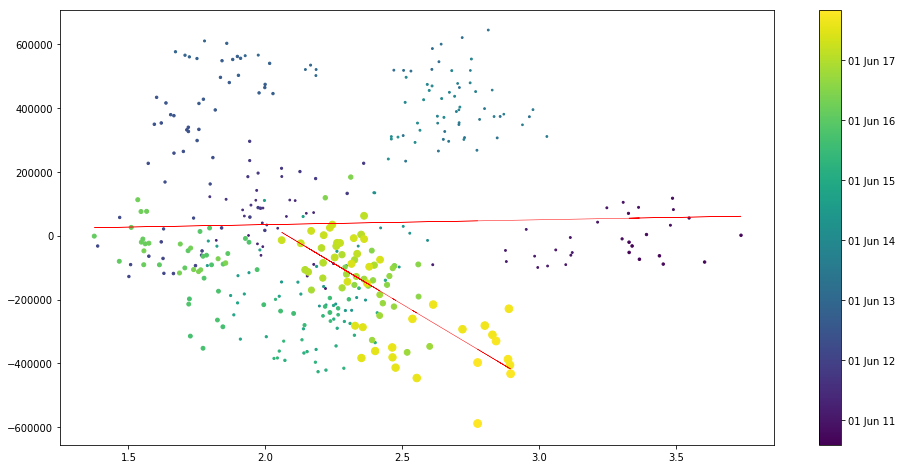

In [50]:
mult_lin_reg(dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
             ["Net_Positioning_Lev_Money"], df['ten_years_us_yield'],0)
# 10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money
# E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     5.567
Date:                Mon, 30 Apr 2018   Prob (F-statistic):             0.0188
Time:                        22:41:03   Log-Likelihood:                -5256.7
No. Observations:                 379   AIC:                         1.052e+04
Df Residuals:                     377   BIC:                         1.053e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.181e+05   6.51e+04     -1.814      0.0

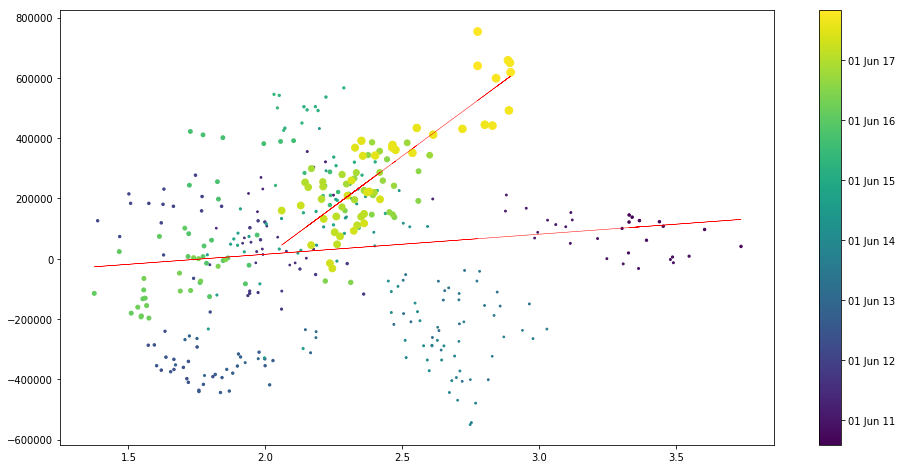

In [51]:
# plot_scatter(df['ten_years_us_yield'], dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]\
#              ["Net_Positioning_Asset_Mgr"], 0)
mult_lin_reg(dictionary_financials["10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE"]["Net_Positioning_Asset_Mgr"],\
            df['ten_years_us_yield'], 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money
# E-MINI S&P 500 STOCK INDEX - CHICAGO MERCANTILE EXCHANGE

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     661.2
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           6.03e-85
Time:                        22:41:04   Log-Likelihood:                -5655.2
No. Observations:                 379   AIC:                         1.131e+04
Df Residuals:                     377   BIC:                         1.132e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.084e+06   6.51e+04     16.642      0.0

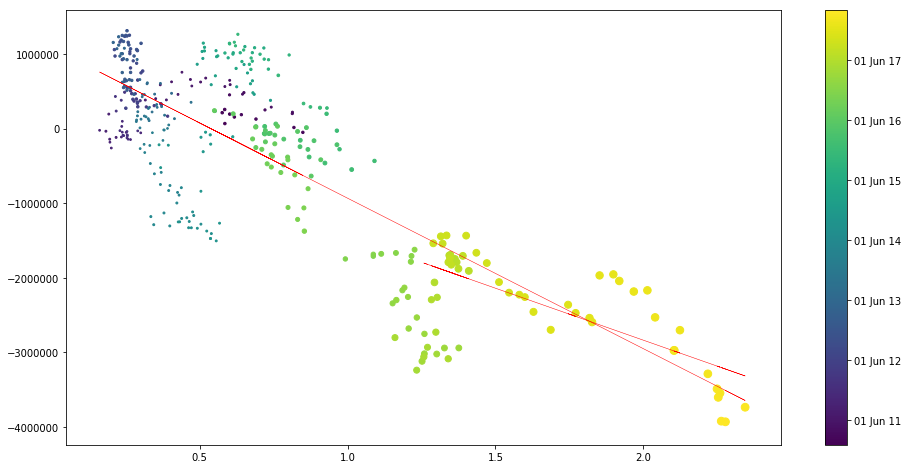

In [52]:
# plot_scatter(df['two_years_us_yield'], dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
#             ["Net_Positioning_Lev_Money"], 0)
mult_lin_reg(dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
            ["Net_Positioning_Lev_Money"], df['two_years_us_yield'], 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     44.95
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           7.40e-11
Time:                        22:41:05   Log-Likelihood:                -5931.2
No. Observations:                 379   AIC:                         1.187e+04
Df Residuals:                     377   BIC:                         1.187e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.605e+06   2.49e+05      6.457      0.0

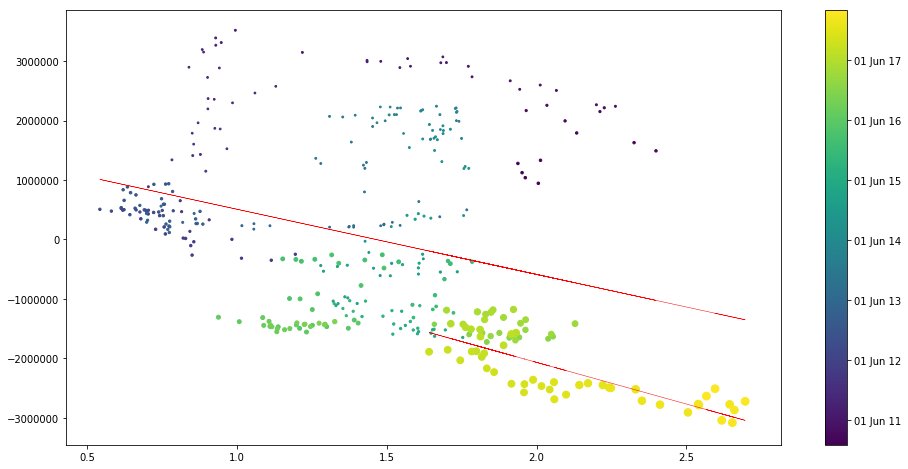

In [53]:
# plot_scatter(df['five_years_us_yield'], dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
#             ["Net_Positioning_Asset_Mgr"], 0)
mult_lin_reg(dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
            ["Net_Positioning_Asset_Mgr"], df['five_years_us_yield'], 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     28.46
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.65e-07
Time:                        22:41:06   Log-Likelihood:                -5833.4
No. Observations:                 379   AIC:                         1.167e+04
Df Residuals:                     377   BIC:                         1.168e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.276e+06   2.98e+05      4.278      0.0

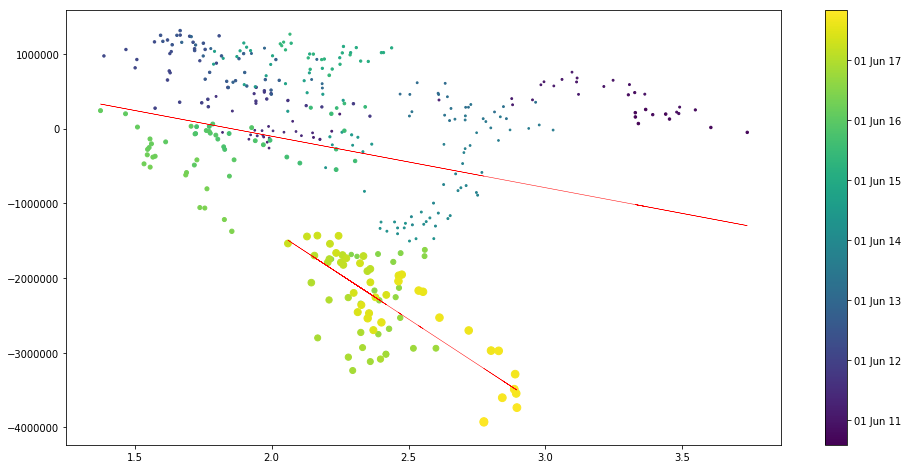

In [54]:
# plot_scatter(df['ten_years_us_yield'], dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
#             ["Net_Positioning_Lev_Money"], 0)
mult_lin_reg(dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
            ["Net_Positioning_Lev_Money"], df['ten_years_us_yield'], 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     376.1
Date:                Mon, 30 Apr 2018   Prob (F-statistic):           1.32e-58
Time:                        22:41:06   Log-Likelihood:                -5821.5
No. Observations:                 379   AIC:                         1.165e+04
Df Residuals:                     377   BIC:                         1.165e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.767e+05   7.64e+04     12.791      0.0

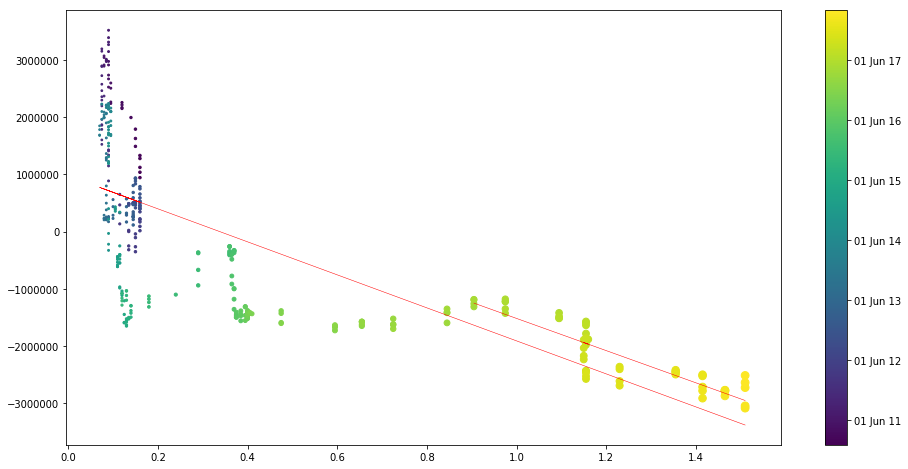

In [55]:
# plot_scatter(fed_funds_rate, dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
#             ["Net_Positioning_Asset_Mgr"], 0)
mult_lin_reg(dictionary_financials["3-MONTH EURODOLLARS - CHICAGO MERCANTILE EXCHANGE"]\
            ["Net_Positioning_Asset_Mgr"], fed_funds_rate, 0)
# Net_Positioning_Asset_Mgr
# Net_Positioning_Lev_Money

(-0.44009478991503637, 2.1957947595800528e-19)
(-0.6945163424736247, 7.3440960156587309e-56)
(-0.16317244702745132, 0.0014349623912754289)


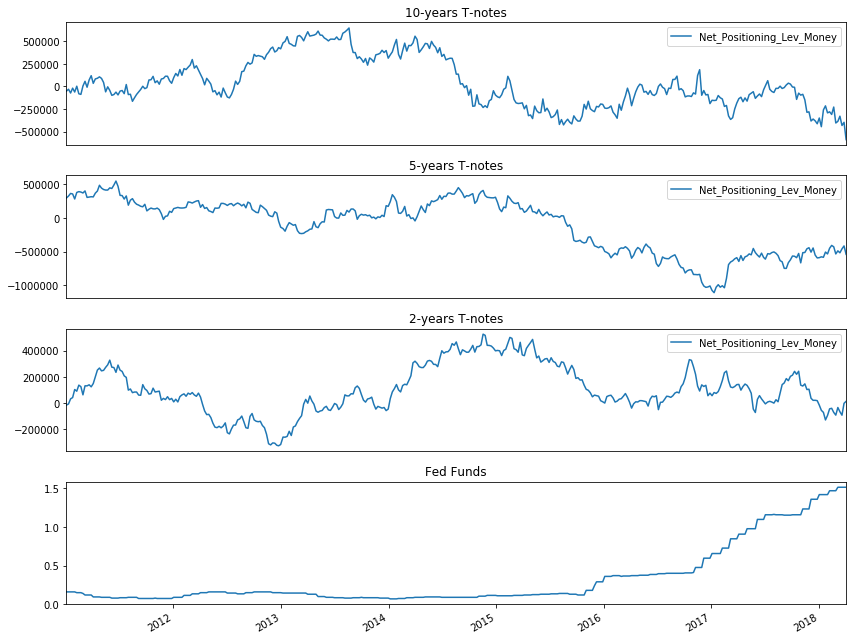

In [56]:
from scipy.stats.stats import pearsonr

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12,9))
#axes[0].title.set_size(55)

dictionary_financials['10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"].plot(ax=axes[0], legend=True, xticks=[], title="10-years T-notes")
dictionary_financials['5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"].plot(ax=axes[1], legend=True, xticks=[], title="5-years T-notes")
dictionary_financials['2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"].plot(ax=axes[2], legend=True, xticks=[], title="2-years T-notes")
fed_funds_rate.plot(ax=axes[3], title="Fed Funds", legend=False)
plt.tight_layout()
#print(pearsonr(y, fed_funds_rate.values.reshape(-1)))

print(pearsonr(dictionary_financials['10-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"], fed_funds_rate.values.reshape(-1)))
print(pearsonr(dictionary_financials['5-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"], fed_funds_rate.values.reshape(-1)))
print(pearsonr(dictionary_financials['2-YEAR U.S. TREASURY NOTES - CHICAGO BOARD OF TRADE']\
    ["Net_Positioning_Lev_Money"], fed_funds_rate.values.reshape(-1)))